In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
target_dirs = ["./p1/", "./p2/", "./p3/", "./p4/", "./p5/"]
in_dir = "result/"
keys = ["test", "train", "valid"]
cm_sum = {}
for d in target_dirs:
    file_list = [d + in_dir + f for f in os.listdir(d+in_dir)]
    for i, f in enumerate(file_list):
        print(f)
        tmp_array = np.load(f)
        print(tmp_array)
        if keys[i] not in cm_sum.keys():
            cm_sum[keys[i]] = tmp_array
        else:
            cm_sum[keys[i]] += tmp_array

./p1/result/test.npy
[[ 0  0  5  2  0  0  0]
 [ 0  2  5  0  1  0  0]
 [ 0  0 11  0  0  0  0]
 [ 0  0  1  4  0  0  0]
 [ 0  0  1  3  1  0  0]
 [ 0  0  2  0  0  3  0]
 [ 0  1  0  0  0  0  2]]
./p1/result/train.npy
[[21  1  1  1  0  0  0]
 [ 0 32  6  0  0  0  0]
 [ 0  0 84  0  0  0  0]
 [ 0  0  1 45  0  0  0]
 [ 0  0  1  1 22  0  0]
 [ 0  0  0  0  0 28  0]
 [ 1  0  0  0  0  0 19]]
./p1/result/valid.npy
[[ 3  0  1  0  1  0  0]
 [ 0  1  3  0  0  0  0]
 [ 0  1 14  1  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  1  0  0  2  0]
 [ 1  1  0  0  0  0  6]]
./p2/result/test.npy
[[ 0  0  1  0  0  0  0]
 [ 0  0  7  0  0  0  0]
 [ 0  0 13  0  0  0  0]
 [ 0  0  2  5  0  0  0]
 [ 0  0  2  3  1  0  0]
 [ 1  0  2  0  0  3  1]
 [ 0  0  0  0  0  0  3]]
./p2/result/train.npy
[[27  0  2  3  0  0  0]
 [ 0 22 10  0  0  0  0]
 [ 0  0 90  0  0  0  0]
 [ 0  0  0 44  0  0  0]
 [ 1  0  5  2  7  1  0]
 [ 1  0  6  0  0 13  0]
 [ 0  0  0  0  0  0 30]]
./p2/result/valid.npy
[[ 0  0  7  0  0  0  0]
 

In [3]:
train = cm_sum["train"]
valid = cm_sum["valid"]
test = cm_sum["test"]


In [4]:
def calculate_precision_recall(confusion_matrix):
    # 各クラスのTrue Positive（真陽性）を取得
    tp = np.diag(confusion_matrix)
    
    acc = np.diag(confusion_matrix).sum() / confusion_matrix.sum()
    
    # Precision（適合率）を計算
    precision = tp / confusion_matrix.sum(axis=0)
    
    # Recall（再現率）を計算
    recall = tp / confusion_matrix.sum(axis=1)
    
    return acc, precision, recall

train_acc, train_precisions, train_recalls = calculate_precision_recall(cm_sum["train"])
valid_acc, valid_precisions, valid_recalls = calculate_precision_recall(cm_sum["valid"])
test_acc, test_precisions, test_recalls = calculate_precision_recall(cm_sum["test"])

In [5]:
print("train_acc:",train_acc)
print("train_precisions:",train_precisions)
print("train_recalls:",train_recalls)

print("valid_acc:",valid_acc)
print("valid_precisions:",valid_precisions)
print("valid_recalls:",valid_recalls)

print("test_acc:",test_acc)
print("test_precisions:",test_precisions)
print("test_recalls:",test_recalls)

train_acc: 0.928030303030303
train_precisions: [0.96183206 0.96598639 0.84804928 0.95652174 0.99009901 0.99193548
 1.        ]
train_recalls: [0.875      0.76344086 0.99758454 0.97058824 0.87719298 0.93181818
 0.97619048]
valid_acc: 0.6227272727272727
valid_precisions: [0.57142857 0.47368421 0.58333333 0.64864865 0.42857143 0.88235294
 0.82608696]
valid_recalls: [0.33333333 0.29032258 0.8115942  0.70588235 0.31578947 0.68181818
 0.9047619 ]
test_acc: 0.6136363636363636
test_precisions: [0.65       0.69230769 0.56565657 0.58333333 0.46153846 0.68421053
 0.85      ]
test_recalls: [0.54166667 0.29032258 0.8115942  0.61764706 0.31578947 0.59090909
 0.80952381]


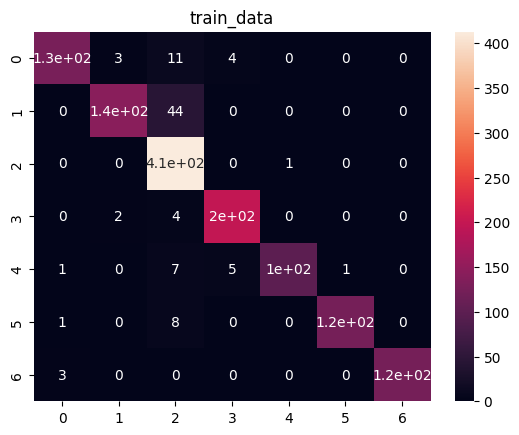

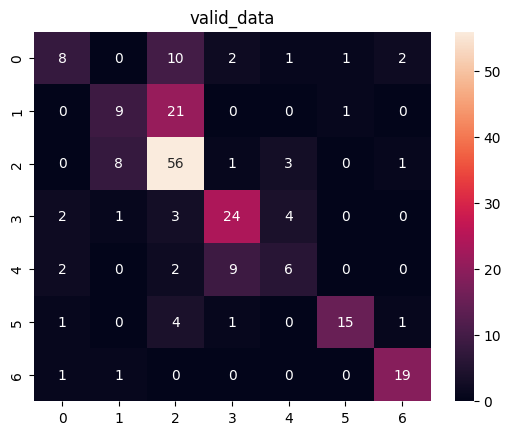

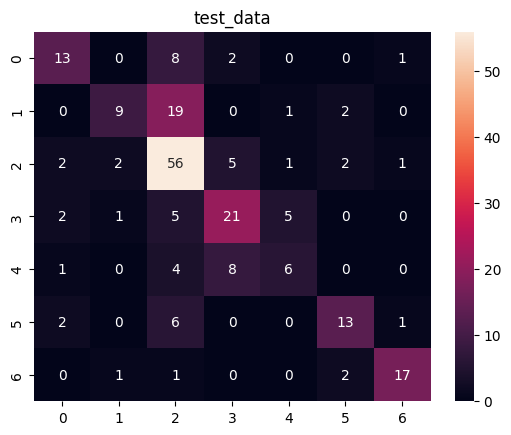

train_precision: [0.96183206 0.96598639 0.84804928 0.95652174 0.99009901 0.99193548
 1.        ]
train_recall [0.875      0.76344086 0.99758454 0.97058824 0.87719298 0.93181818
 0.97619048]
[[126   3  11   4   0   0   0]
 [  0 142  44   0   0   0   0]
 [  0   0 413   0   1   0   0]
 [  0   2   4 198   0   0   0]
 [  1   0   7   5 100   1   0]
 [  1   0   8   0   0 123   0]
 [  3   0   0   0   0   0 123]]
valid_precision: [0.57142857 0.47368421 0.58333333 0.64864865 0.42857143 0.88235294
 0.82608696]
valid_recall [0.33333333 0.29032258 0.8115942  0.70588235 0.31578947 0.68181818
 0.9047619 ]
[[ 8  0 10  2  1  1  2]
 [ 0  9 21  0  0  1  0]
 [ 0  8 56  1  3  0  1]
 [ 2  1  3 24  4  0  0]
 [ 2  0  2  9  6  0  0]
 [ 1  0  4  1  0 15  1]
 [ 1  1  0  0  0  0 19]]
test_precision: [0.65       0.69230769 0.56565657 0.58333333 0.46153846 0.68421053
 0.85      ]
test_recall [0.54166667 0.29032258 0.8115942  0.61764706 0.31578947 0.59090909
 0.80952381]
[[13  0  8  2  0  0  1]
 [ 0  9 19  0  1  2  

In [6]:
sns.heatmap(train, annot=True)
if not os.path.exists("./image"):
    os.mkdir("./image")
plt.title("train_data")
#plt.savefig('./image/train_confusion_matrix.png')
plt.show()
sns.heatmap(valid, annot=True)
plt.title("valid_data")
#plt.savefig('./image/valid_confusion_matrix.png')
plt.show()
sns.heatmap(test, annot=True)
plt.title("test_data")
#plt.savefig('./image/valid_confusion_matrix.png')
plt.show()
print("train_precision:",train_precisions)
print("train_recall",train_recalls)
print(train)

print("valid_precision:", valid_precisions)
print("valid_recall", valid_recalls)
print(valid)

print("test_precision:", test_precisions)
print("test_recall", test_recalls)
print(test)